<a href="https://colab.research.google.com/github/shengy90/MSc-Project/blob/master/notebooks/Data_Exploration_29th_June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Authenticate with BigQuery ☁️**

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
%%bigquery --project machine-learning-msc df
SELECT 
  COUNT(*) as total_rows
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats`

In [3]:
df

,total_rows
0,167932474


### **Importing Libraries⏬**

In [121]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import random

from datetime import date

sns.set()
%matplotlib inline

# **Exploring Dataset 🔭**

Note - this can take a while to download!

In [5]:
%%bigquery --project machine-learning-msc df
SELECT 
*
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats` 
WHERE sample=0 

In [106]:
df['day'] = pd.to_datetime(df['day'])

In [110]:
df.head()

,lcl_id,ts,year,month,day,hour,minute,stdortou,tariff_type,tariff,kwhh,acorn,acorn_grouped,sample
0,MAC000260,2013-05-29 13:00:00+00:00,2013-01-01,2013-05-01,2013-05-29,13,0,Std,Normal,14.228,0.041,G,Comfortable,0
1,MAC000260,2013-06-21 07:00:00+00:00,2013-01-01,2013-06-01,2013-06-21,7,0,Std,Normal,14.228,0.018,G,Comfortable,0
2,MAC000260,2013-10-30 02:30:00+00:00,2013-01-01,2013-10-01,2013-10-30,2,30,Std,Normal,14.228,0.038,G,Comfortable,0
3,MAC000260,2013-12-11 14:30:00+00:00,2013-01-01,2013-12-01,2013-12-11,14,30,Std,Normal,14.228,0.594,G,Comfortable,0
4,MAC000260,2012-02-03 17:00:00+00:00,2012-01-01,2012-02-01,2012-02-03,17,0,Std,Normal,14.228,0.167,G,Comfortable,0


In [159]:
def select_random_lcl_id(df, acorn_grouped):
    # query strings 
    acorn_group_string = f"and acorn_grouped=='{acorn_grouped}'"

    # create a list of all lcl_ids that meets the query criteria
    query_string = f"lcl_id!= None {acorn_group_string}"
    data = df.query(query_string)
    lcl_ids = list(set(data['lcl_id']))
    return random.choice(lcl_ids) # returns random item from list

def plot_timeseries(df, start_date, end_date):
    data = pd.DataFrame(columns=df.columns)
    start_date_string = f"and day>='{start_date}'"
    end_date_string = f"and day<='{end_date}'"

    acorn_groups = ['Affluent', 'Comfortable', 'Adversity']
    for group in acorn_groups:
        lcl_id = select_random_lcl_id(df, group)



        query_string = f"lcl_id=='{lcl_id}' {start_date_string} {end_date_string}"
        query = df.query(query_string)
        data = pd.concat([data, query])

    plt.figure(figsize=(20, 5))
    print(set(data['lcl_id']))
    sns.lineplot(x='ts', y="kwhh", data=data, hue='acorn_grouped')
    return data 

##### **Load profiles for 1st Jan 2013**

{'MAC003378', 'MAC002833', 'MAC003333'}


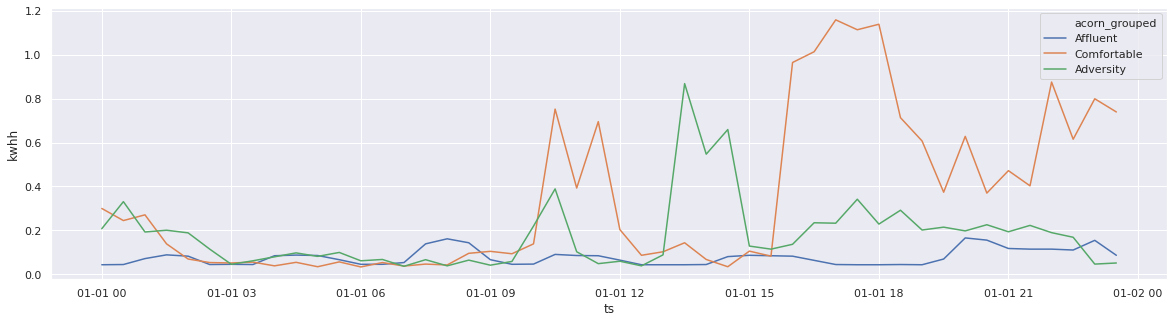

In [160]:
test = plot_timeseries(df, start_date=date(2013,1,1), end_date=date(2013,1,1))

{'MAC003359', 'MAC003287', 'MAC005499'}


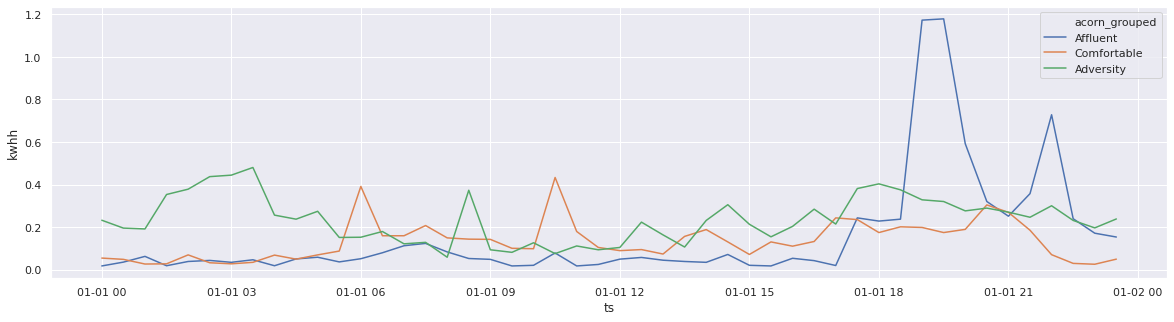

In [162]:
test = plot_timeseries(df, start_date=date(2013,1,1), end_date=date(2013,1,1))

{'MAC003596', 'MAC003792', 'MAC005356'}


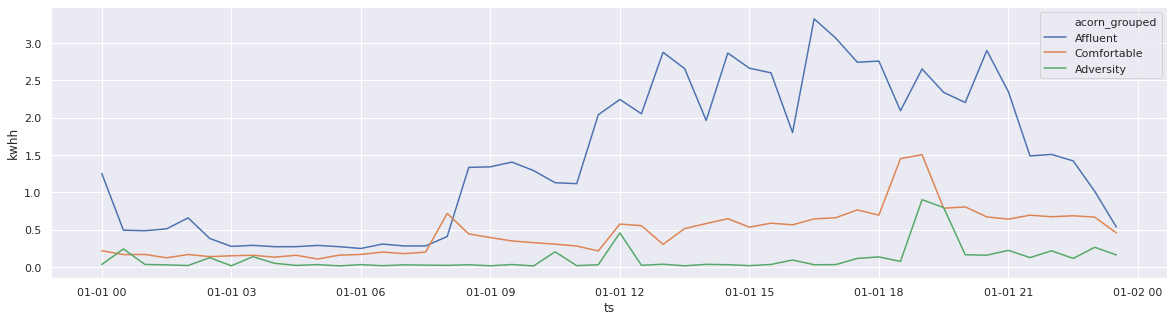

In [163]:
test = plot_timeseries(df, start_date=date(2013,1,1), end_date=date(2013,1,1))

##### **Load profiles for 1st Jun 2013**

{'MAC003277', 'MAC003320', 'MAC004716'}


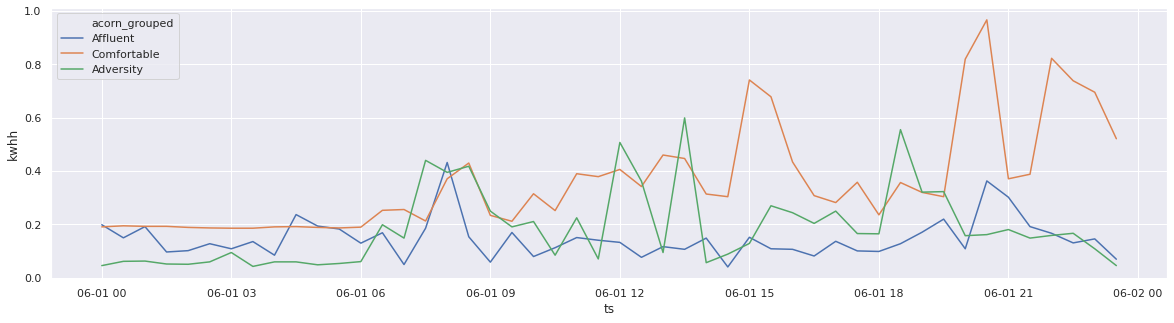

In [164]:
test = plot_timeseries(df, start_date=date(2013,6,1), end_date=date(2013,6,1))

{'MAC000979', 'MAC001080', 'MAC004622'}


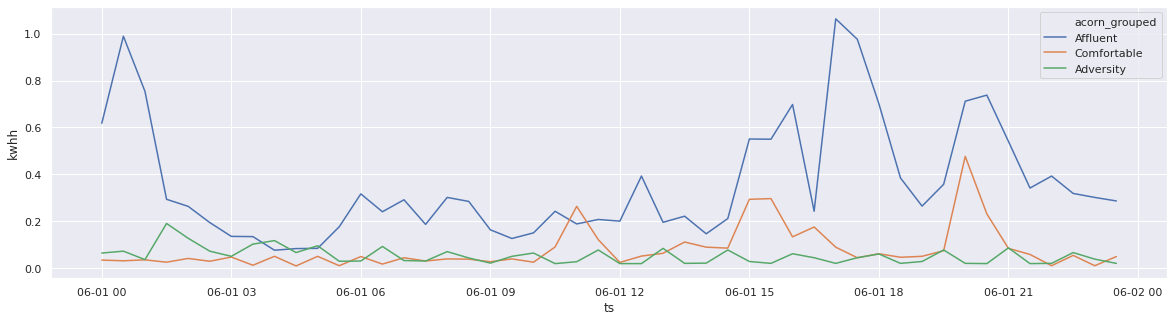

In [165]:
test = plot_timeseries(df, start_date=date(2013,6,1), end_date=date(2013,6,1))

{'MAC003596', 'MAC005499', 'MAC005356'}


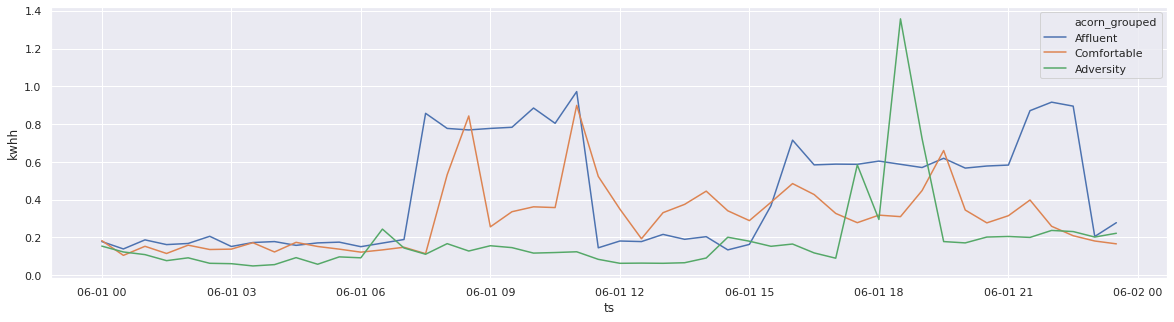

In [166]:
test = plot_timeseries(df, start_date=date(2013,6,1), end_date=date(2013,6,1))